# Laboratorio 2: Clasificación con regresión logística

## Lectura de datos

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

skin_df = pd.read_csv('data/HAM10000/HAM10000_metadata.csv')

#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('data/HAM10000/', '*', '*.jpg'))}

#Define the path and add as a new column
skin_df['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


Para tener una cantidad equitativa de imágenes de cada tipo de lesión, reducimos el dataset de manera aleatoria.

In [22]:
# Establecer una semilla aleatoria para reproducibilidad
np.random.seed(0)

# Número deseado de datapoints por tipo de lesión para las clases especificadas
desired_count = 150

# Filtrar el DataFrame para las clases específicas que deseas reducir
classes_to_reduce = ['nv', 'mel', 'bkl', 'bcc', 'akiec']

# Crear un DataFrame vacío para los nuevos datos reducidos
new_skin_df = pd.DataFrame()

# Iterar a través de las clases y reducir la cantidad de datapoints al azar
for dx_class in classes_to_reduce:
    # Seleccionar aleatoriamente los índices de los datapoints
    selected_indices = np.random.choice(
        skin_df[skin_df['dx'] == dx_class].index, desired_count, replace=False
    )
    
    # Agregar los datapoints seleccionados al nuevo DataFrame
    new_skin_df = pd.concat([new_skin_df, skin_df.loc[selected_indices]])

# Filtrar el DataFrame original para mantener las clases no especificadas
remaining_classes = [dx_class for dx_class in skin_df['dx'].unique() if dx_class not in classes_to_reduce]
remaining_data = skin_df[~skin_df['dx'].isin(classes_to_reduce)]

# Concatenar los DataFrames reducidos y los DataFrames con las clases no especificadas
final_skin_df = pd.concat([new_skin_df, remaining_data])


# Mostrar la cantidad de datos reducidos por clase
#print(final_skin_df['dx'].value_counts())

# Ahora, final_skin_df contiene todas las clases, con algunas clases reducidas a 150 datapoints.
skin_df = final_skin_df
print(skin_df['dx'].value_counts())


dx
nv       150
mel      150
bkl      150
bcc      150
akiec    150
vasc     142
df       115
Name: count, dtype: int64


Listamos las imágenes de cada tipo

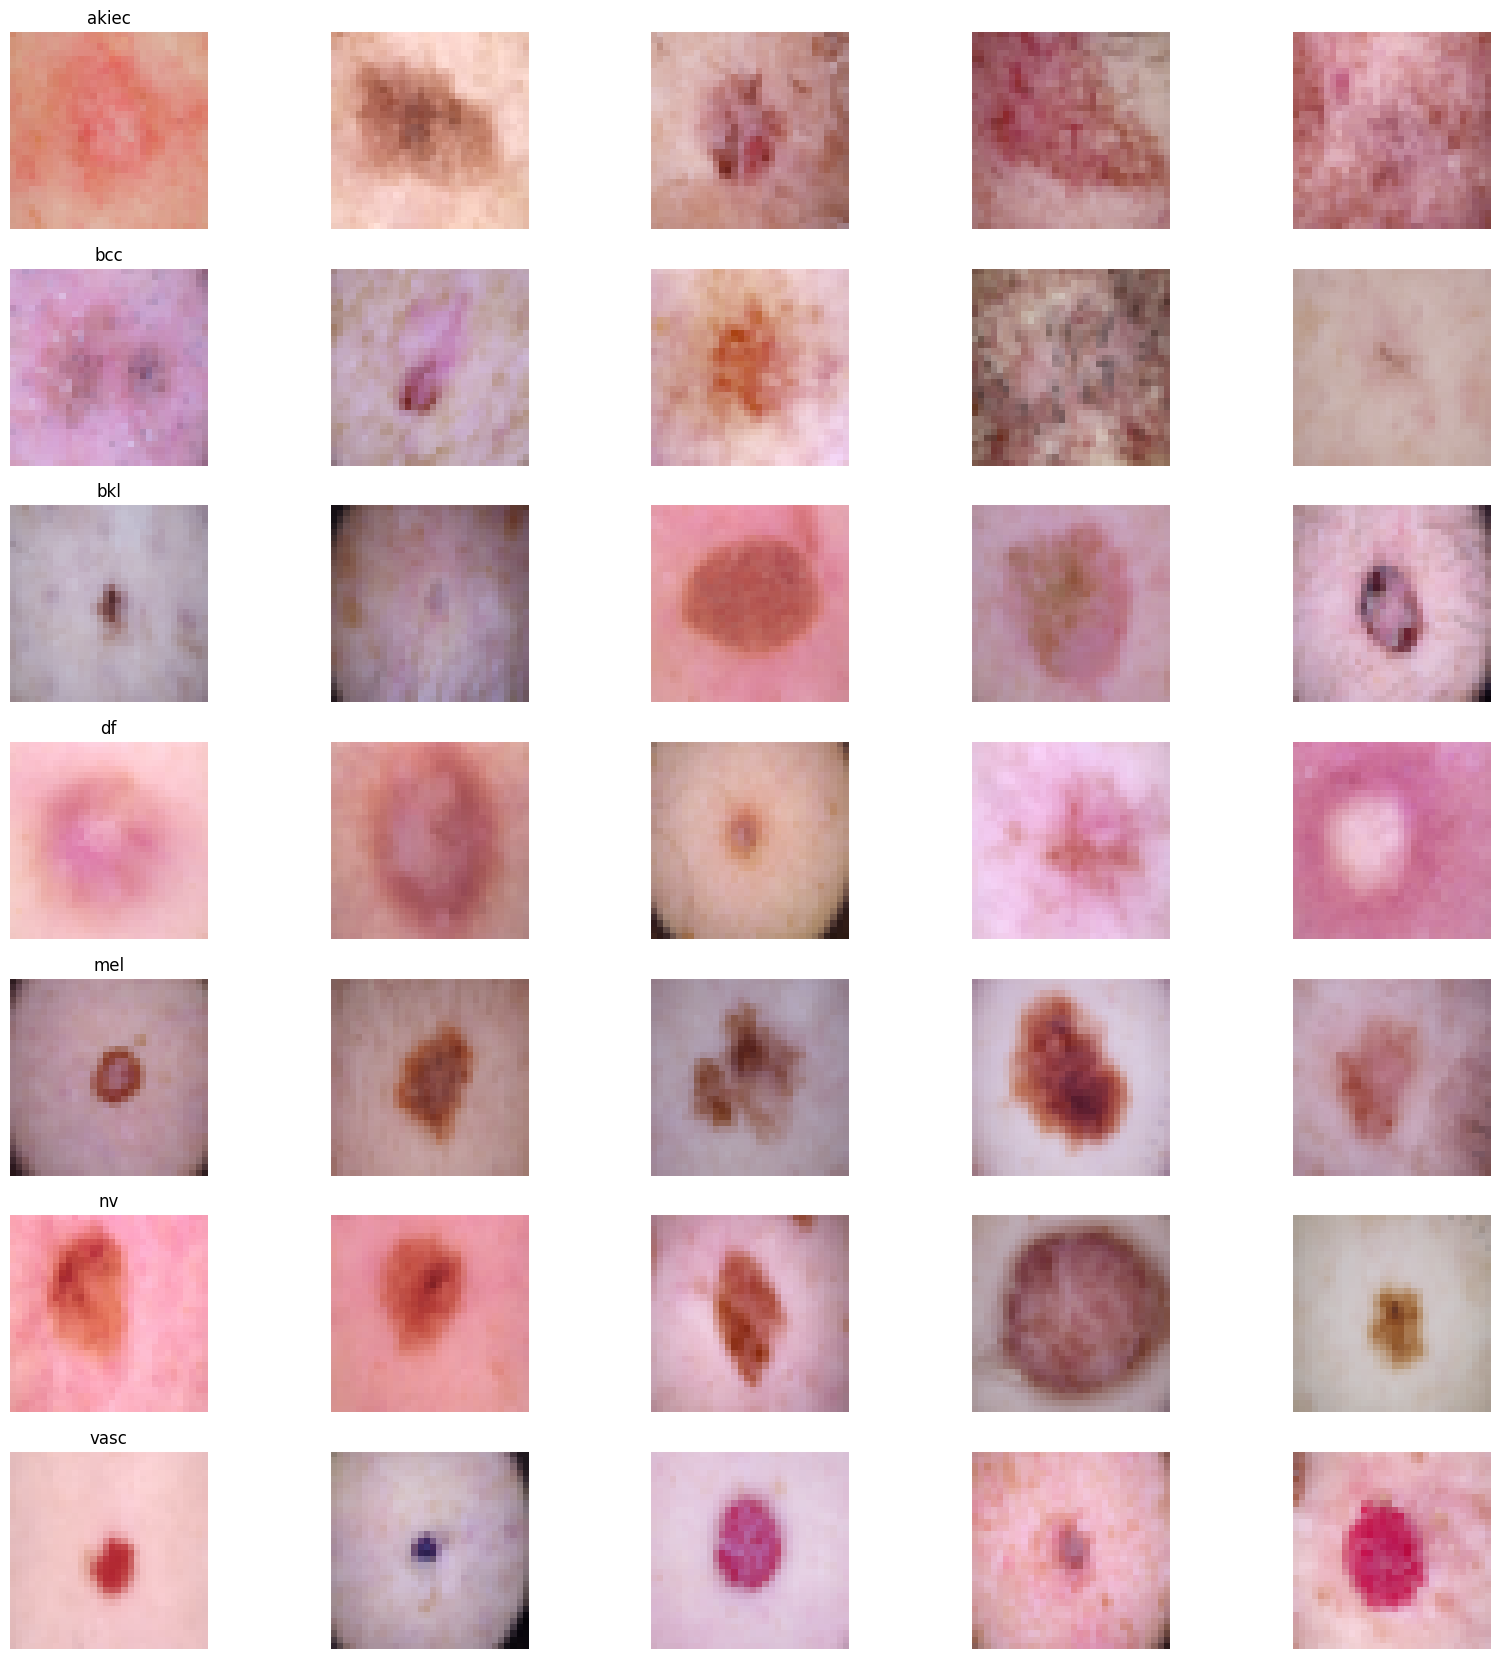

In [23]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')